In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from numpy import asarray
from sklearn.preprocessing import OneHotEncoder, MinMaxScaler
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.model_selection import train_test_split, ValidationCurveDisplay
from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report, log_loss
from keras import Sequential
from keras.layers import Dense
import tensorflow as tf

In [3]:
df_churn = pd.read_csv('churn_data.csv')
df_customer = pd.read_csv('customer_data.csv')
df_internet = pd.read_csv('internet_data.csv')

In [4]:
df_customer_internet = pd.merge(df_customer, df_internet, how = 'inner', on = 'customerID')
df_combined = pd.merge(df_customer_internet, df_churn, how = 'inner', on = 'customerID')

In [5]:
df_combined.head(10)

,customerID,gender,SeniorCitizen,Partner,Dependents,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,...,StreamingTV,StreamingMovies,tenure,PhoneService,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,No phone service,DSL,No,Yes,No,...,No,No,1,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,No,DSL,Yes,No,Yes,...,No,No,34,Yes,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,No,DSL,Yes,Yes,No,...,No,No,2,Yes,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,No phone service,DSL,Yes,No,Yes,...,No,No,45,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,No,Fiber optic,No,No,No,...,No,No,2,Yes,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
5,9305-CDSKC,Female,0,No,No,Yes,Fiber optic,No,No,Yes,...,Yes,Yes,8,Yes,Month-to-month,Yes,Electronic check,99.65,820.5,Yes
6,1452-KIOVK,Male,0,No,Yes,Yes,Fiber optic,No,Yes,No,...,Yes,No,22,Yes,Month-to-month,Yes,Credit card (automatic),89.10,1949.4,No
7,6713-OKOMC,Female,0,No,No,No phone service,DSL,Yes,No,No,...,No,No,10,No,Month-to-month,No,Mailed check,29.75,301.9,No
8,7892-POOKP,Female,0,Yes,No,Yes,Fiber optic,No,No,Yes,...,Yes,Yes,28,Yes,Month-to-month,Yes,Electronic check,104.80,3046.05,Yes
9,6388-TABGU,Male,0,No,Yes,No,DSL,Yes,Yes,No,...,No,No,62,Yes,One year,No,Bank transfer (automatic),56.15,3487.95,No


In [6]:
df_combined.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7042 entries, 0 to 7041
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7042 non-null   object 
 1   gender            7042 non-null   object 
 2   SeniorCitizen     7042 non-null   int64  
 3   Partner           7042 non-null   object 
 4   Dependents        7042 non-null   object 
 5   MultipleLines     7042 non-null   object 
 6   InternetService   7042 non-null   object 
 7   OnlineSecurity    7042 non-null   object 
 8   OnlineBackup      7042 non-null   object 
 9   DeviceProtection  7042 non-null   object 
 10  TechSupport       7042 non-null   object 
 11  StreamingTV       7042 non-null   object 
 12  StreamingMovies   7042 non-null   object 
 13  tenure            7042 non-null   int64  
 14  PhoneService      7042 non-null   object 
 15  Contract          7042 non-null   object 
 16  PaperlessBilling  7042 non-null   object 


In [7]:
for column in df_combined: 
    print(column)
    print(df_combined[column].value_counts())
    print("\n")

customerID
7590-VHVEG    1
7036-ZZKBD    1
5956-YHHRX    1
5365-LLFYV    1
5855-EIBDE    1
             ..
9796-MVYXX    1
2637-FKFSY    1
1552-AAGRX    1
4304-TSPVK    1
8361-LTMKD    1
Name: customerID, Length: 7042, dtype: int64


gender
Male      3554
Female    3488
Name: gender, dtype: int64


SeniorCitizen
0    5900
1    1142
Name: SeniorCitizen, dtype: int64


Partner
No     3640
Yes    3402
Name: Partner, dtype: int64


Dependents
No     4932
Yes    2110
Name: Dependents, dtype: int64


MultipleLines
No                  3389
Yes                 2971
No phone service     682
Name: MultipleLines, dtype: int64


InternetService
Fiber optic    3095
DSL            2421
No             1526
Name: InternetService, dtype: int64


OnlineSecurity
No                     3498
Yes                    2018
No internet service    1526
Name: OnlineSecurity, dtype: int64


OnlineBackup
No                     3087
Yes                    2429
No internet service    1526
Name: OnlineBackup, dtype: i

In [8]:
columns = []

for column in ["gender", "Partner", "Dependents", "MultipleLines", "InternetService", "OnlineSecurity", "OnlineBackup",
               "DeviceProtection", "TechSupport", "StreamingTV", "StreamingMovies", "PhoneService", "Contract", 
               "PaperlessBilling", "PaymentMethod"]: 
    
    for category in df_combined[column].unique():
        columns.append(column + "_" + category)

print(columns)

['gender_Female', 'gender_Male', 'Partner_Yes', 'Partner_No', 'Dependents_No', 'Dependents_Yes', 'MultipleLines_No phone service', 'MultipleLines_No', 'MultipleLines_Yes', 'InternetService_DSL', 'InternetService_Fiber optic', 'InternetService_No', 'OnlineSecurity_No', 'OnlineSecurity_Yes', 'OnlineSecurity_No internet service', 'OnlineBackup_Yes', 'OnlineBackup_No', 'OnlineBackup_No internet service', 'DeviceProtection_No', 'DeviceProtection_Yes', 'DeviceProtection_No internet service', 'TechSupport_No', 'TechSupport_Yes', 'TechSupport_No internet service', 'StreamingTV_No', 'StreamingTV_Yes', 'StreamingTV_No internet service', 'StreamingMovies_No', 'StreamingMovies_Yes', 'StreamingMovies_No internet service', 'PhoneService_No', 'PhoneService_Yes', 'Contract_Month-to-month', 'Contract_One year', 'Contract_Two year', 'PaperlessBilling_Yes', 'PaperlessBilling_No', 'PaymentMethod_Electronic check', 'PaymentMethod_Mailed check', 'PaymentMethod_Bank transfer (automatic)', 'PaymentMethod_Cred

In [9]:
data = np.array(df_combined)
print(data, "\n", data[0])

[['7590-VHVEG' 'Female' 0 ... 29.85 '29.85' 'No']
 ['5575-GNVDE' 'Male' 0 ... 56.95 '1889.5' 'No']
 ['3668-QPYBK' 'Male' 0 ... 53.85 '108.15' 'Yes']
 ...
 ['2234-XADUH' 'Female' 0 ... 103.2 '7362.9' 'No']
 ['4801-JZAZL' 'Female' 0 ... 29.6 '346.45' 'No']
 ['8361-LTMKD' 'Male' 1 ... 74.4 '306.6' 'Yes']] 
 ['7590-VHVEG' 'Female' 0 'Yes' 'No' 'No phone service' 'DSL' 'No' 'Yes'
 'No' 'No' 'No' 'No' 1 'No' 'Month-to-month' 'Yes' 'Electronic check'
 29.85 '29.85' 'No']


In [10]:
data_to_be_transformed = np.concatenate((data[:, 1:2], data[:, 3:13], data[:, 14:18]), axis = 1)
print(data_to_be_transformed, "\n", data_to_be_transformed[0])

[['Female' 'Yes' 'No' ... 'Month-to-month' 'Yes' 'Electronic check']
 ['Male' 'No' 'No' ... 'One year' 'No' 'Mailed check']
 ['Male' 'No' 'No' ... 'Month-to-month' 'Yes' 'Mailed check']
 ...
 ['Female' 'Yes' 'Yes' ... 'One year' 'Yes' 'Credit card (automatic)']
 ['Female' 'Yes' 'Yes' ... 'Month-to-month' 'Yes' 'Electronic check']
 ['Male' 'Yes' 'No' ... 'Month-to-month' 'Yes' 'Mailed check']] 
 ['Female' 'Yes' 'No' 'No phone service' 'DSL' 'No' 'Yes' 'No' 'No' 'No'
 'No' 'No' 'Month-to-month' 'Yes' 'Electronic check']


In [11]:
data_transformed = OneHotEncoder().fit_transform(data_to_be_transformed).toarray()
print(data_transformed, "\n", data_transformed[0])

[[1. 0. 0. ... 0. 1. 0.]
 [0. 1. 1. ... 0. 0. 1.]
 [0. 1. 1. ... 0. 0. 1.]
 ...
 [1. 0. 0. ... 1. 0. 0.]
 [1. 0. 0. ... 0. 1. 0.]
 [0. 1. 0. ... 0. 0. 1.]] 
 [1. 0. 0. 1. 1. 0. 0. 1. 0. 1. 0. 0. 1. 0. 0. 0. 0. 1. 1. 0. 0. 1. 0. 0.
 1. 0. 0. 1. 0. 0. 1. 0. 1. 0. 0. 0. 1. 0. 0. 1. 0.]


In [12]:
df_transformed = pd.DataFrame(data = data_transformed, columns = columns)
df_transformed.head()

,gender_Female,gender_Male,Partner_Yes,Partner_No,Dependents_No,Dependents_Yes,MultipleLines_No phone service,MultipleLines_No,MultipleLines_Yes,InternetService_DSL,...,PhoneService_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaperlessBilling_No,PaymentMethod_Electronic check,PaymentMethod_Mailed check,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic)
0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
1,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,...,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
2,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,...,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
3,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,...,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
4,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,...,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0


In [25]:
df_combined_transformed = pd.concat([df_combined, df_transformed], axis = 1)
df_combined_transformed.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,...,PhoneService_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaperlessBilling_No,PaymentMethod_Electronic check,PaymentMethod_Mailed check,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic)
0,7590-VHVEG,Female,0,Yes,No,No phone service,DSL,No,Yes,No,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
1,5575-GNVDE,Male,0,No,No,No,DSL,Yes,No,Yes,...,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
2,3668-QPYBK,Male,0,No,No,No,DSL,Yes,Yes,No,...,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
3,7795-CFOCW,Male,0,No,No,No phone service,DSL,Yes,No,Yes,...,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
4,9237-HQITU,Female,0,No,No,No,Fiber optic,No,No,No,...,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0


In [26]:
df_combined_transformed = df_combined_transformed.drop(columns = ["gender", "Partner", "Dependents", "MultipleLines", 
                                                                  "InternetService", "OnlineSecurity", "OnlineBackup", 
                                                                  "DeviceProtection", "TechSupport", "StreamingTV", 
                                                                  "StreamingMovies", "PhoneService", "Contract", 
                                                                  "PaperlessBilling", "PaymentMethod"])
df_combined_transformed.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7042 entries, 0 to 7041
Data columns (total 47 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   customerID                               7042 non-null   object 
 1   SeniorCitizen                            7042 non-null   int64  
 2   tenure                                   7042 non-null   int64  
 3   MonthlyCharges                           7042 non-null   float64
 4   TotalCharges                             7042 non-null   object 
 5   Churn                                    7042 non-null   object 
 6   gender_Female                            7042 non-null   float64
 7   gender_Male                              7042 non-null   float64
 8   Partner_Yes                              7042 non-null   float64
 9   Partner_No                               7042 non-null   float64
 10  Dependents_No                            7042 no

In [27]:
df_combined_transformed["TotalCharges"] = pd.to_numeric(df_combined_transformed["TotalCharges"], errors = "coerce")

In [28]:
df_combined_transformed.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7042 entries, 0 to 7041
Data columns (total 47 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   customerID                               7042 non-null   object 
 1   SeniorCitizen                            7042 non-null   int64  
 2   tenure                                   7042 non-null   int64  
 3   MonthlyCharges                           7042 non-null   float64
 4   TotalCharges                             7031 non-null   float64
 5   Churn                                    7042 non-null   object 
 6   gender_Female                            7042 non-null   float64
 7   gender_Male                              7042 non-null   float64
 8   Partner_Yes                              7042 non-null   float64
 9   Partner_No                               7042 non-null   float64
 10  Dependents_No                            7042 no

In [29]:
df_combined_transformed.dropna(inplace = True)

In [30]:
df_combined_transformed.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7031 entries, 0 to 7041
Data columns (total 47 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   customerID                               7031 non-null   object 
 1   SeniorCitizen                            7031 non-null   int64  
 2   tenure                                   7031 non-null   int64  
 3   MonthlyCharges                           7031 non-null   float64
 4   TotalCharges                             7031 non-null   float64
 5   Churn                                    7031 non-null   object 
 6   gender_Female                            7031 non-null   float64
 7   gender_Male                              7031 non-null   float64
 8   Partner_Yes                              7031 non-null   float64
 9   Partner_No                               7031 non-null   float64
 10  Dependents_No                            7031 no

In [31]:
df_combined_transformed.head()

,customerID,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,Churn,gender_Female,gender_Male,Partner_Yes,Partner_No,...,PhoneService_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaperlessBilling_No,PaymentMethod_Electronic check,PaymentMethod_Mailed check,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic)
0,7590-VHVEG,0,1,29.85,29.85,No,1.0,0.0,0.0,1.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
1,5575-GNVDE,0,34,56.95,1889.50,No,0.0,1.0,1.0,0.0,...,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
2,3668-QPYBK,0,2,53.85,108.15,Yes,0.0,1.0,1.0,0.0,...,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
3,7795-CFOCW,0,45,42.30,1840.75,No,0.0,1.0,1.0,0.0,...,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
4,9237-HQITU,0,2,70.70,151.65,Yes,1.0,0.0,1.0,0.0,...,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0


In [32]:
df_inputs = df_combined_transformed.drop(columns = ["customerID", "Churn"])
df_vif = pd.DataFrame(columns = ["Column", "VIF"])

df_vif["Column"] = df_inputs.columns
df_vif["VIF"] = [round(variance_inflation_factor(df_inputs.values, i),4) for i in range(df_inputs.shape[1])]

df_vif.head(50)

C:\Users\user\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\stats\outliers_influence.py:198: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)


,Column,VIF
0,SeniorCitizen,1.1532
1,tenure,7.5830
2,MonthlyCharges,865.9058
3,TotalCharges,10.8082
4,gender_Female,inf
5,gender_Male,inf
6,Partner_Yes,inf
7,Partner_No,inf
8,Dependents_No,inf
9,Dependents_Yes,inf


In [33]:
df_combined_transformed = df_combined_transformed.drop(columns = ["gender_Male", "Partner_No", "Dependents_No", 
                                                                  "MultipleLines_Yes", "InternetService_No", 
                                                                  "OnlineSecurity_Yes", "OnlineBackup_Yes", 
                                                                  "DeviceProtection_Yes", "TechSupport_Yes","StreamingTV_Yes", 
                                                                  "StreamingMovies_Yes", "PhoneService_No", "Contract_Two year",
                                                                  "PaperlessBilling_No", "PaymentMethod_Electronic check", 
                                                                  "MonthlyCharges"
                                                                 ])
df_combined_transformed.head()

,customerID,SeniorCitizen,tenure,TotalCharges,Churn,gender_Female,Partner_Yes,Dependents_Yes,MultipleLines_No phone service,MultipleLines_No,...,StreamingTV_No internet service,StreamingMovies_No,StreamingMovies_No internet service,PhoneService_Yes,Contract_Month-to-month,Contract_One year,PaperlessBilling_Yes,PaymentMethod_Mailed check,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic)
0,7590-VHVEG,0,1,29.85,No,1.0,0.0,0.0,0.0,1.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
1,5575-GNVDE,0,34,1889.50,No,0.0,1.0,0.0,1.0,0.0,...,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0
2,3668-QPYBK,0,2,108.15,Yes,0.0,1.0,0.0,1.0,0.0,...,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0
3,7795-CFOCW,0,45,1840.75,No,0.0,1.0,0.0,0.0,1.0,...,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0
4,9237-HQITU,0,2,151.65,Yes,1.0,1.0,0.0,1.0,0.0,...,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0


In [36]:
df_inputs = df_combined_transformed.drop(columns = ["customerID", "Churn"])
df_vif = pd.DataFrame(columns = ["Column", "VIF"])

df_vif["Column"] = df_inputs.columns
df_vif["VIF"] = [round(variance_inflation_factor(df_inputs.values, i), 4) for i in range(df_inputs.shape[1])]

df_vif.head(50)

C:\Users\user\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\stats\outliers_influence.py:198: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)


,Column,VIF
0,SeniorCitizen,1.1532
1,tenure,7.5708
2,TotalCharges,10.7788
3,gender_Female,1.0020
4,Partner_Yes,1.4627
5,Dependents_Yes,1.3815
6,MultipleLines_No phone service,1.4917
7,MultipleLines_No,inf
8,InternetService_DSL,inf
9,InternetService_Fiber optic,inf


In [37]:
df_combined_transformed.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7031 entries, 0 to 7041
Data columns (total 31 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   customerID                               7031 non-null   object 
 1   SeniorCitizen                            7031 non-null   int64  
 2   tenure                                   7031 non-null   int64  
 3   TotalCharges                             7031 non-null   float64
 4   Churn                                    7031 non-null   object 
 5   gender_Female                            7031 non-null   float64
 6   Partner_Yes                              7031 non-null   float64
 7   Dependents_Yes                           7031 non-null   float64
 8   MultipleLines_No phone service           7031 non-null   float64
 9   MultipleLines_No                         7031 non-null   float64
 10  InternetService_DSL                      7031 no

In [38]:
# Start of feature scaling
data_combined_transformed = np.array(df_combined_transformed)
print(data_combined_transformed)

[['7590-VHVEG' 0 1 ... 0.0 1.0 0.0]
 ['5575-GNVDE' 0 34 ... 0.0 0.0 1.0]
 ['3668-QPYBK' 0 2 ... 0.0 0.0 1.0]
 ...
 ['2234-XADUH' 0 72 ... 1.0 0.0 0.0]
 ['4801-JZAZL' 0 11 ... 0.0 1.0 0.0]
 ['8361-LTMKD' 1 4 ... 0.0 0.0 1.0]]


In [39]:
x = np.concatenate((data_combined_transformed[:, 1:4], data_combined_transformed[:, 5:]), axis = 1)
y = data_combined_transformed[:, 4]
print(x, "\n", x[0], "\n", y)

[[0 1 29.85 ... 0.0 1.0 0.0]
 [0 34 1889.5 ... 0.0 0.0 1.0]
 [0 2 108.15 ... 0.0 0.0 1.0]
 ...
 [0 72 7362.9 ... 1.0 0.0 0.0]
 [0 11 346.45 ... 0.0 1.0 0.0]
 [1 4 306.6 ... 0.0 0.0 1.0]] 
 [0 1 29.85 1.0 0.0 0.0 0.0 1.0 1.0 0.0 1.0 0.0 0.0 1.0 1.0 0.0 1.0 0.0 1.0
 0.0 1.0 0.0 0.0 1.0 0.0 0.0 0.0 1.0 0.0] 
 ['No' 'No' 'Yes' ... 'No' 'No' 'Yes']


In [40]:
x_scaled = MinMaxScaler().fit_transform(x)
print(x_scaled)

[[0.         0.         0.0012751  ... 0.         1.         0.        ]
 [0.         0.46478873 0.21586661 ... 0.         0.         1.        ]
 [0.         0.01408451 0.01031041 ... 0.         0.         1.        ]
 ...
 [0.         1.         0.84746134 ... 1.         0.         0.        ]
 [0.         0.14084507 0.03780868 ... 0.         1.         0.        ]
 [1.         0.04225352 0.03321025 ... 0.         0.         1.        ]]


In [41]:
# Start of logistic regression
x_train, x_test, y_train, y_test = train_test_split(x_scaled, y, test_size = 0.2, random_state = 0)

In [46]:
logisticModels = []
logisticModels.append(LogisticRegression(penalty = None, max_iter = 1000, multi_class = 'ovr', random_state = 0, solver = 'saga').fit(x_train, y_train))
logisticModels.append(LogisticRegression(penalty = 'l1', max_iter = 1000, multi_class = 'ovr', random_state = 0, solver = 'saga').fit(x_train, y_train))
logisticModels.append(LogisticRegression(penalty = 'l2', max_iter = 1000, multi_class = 'ovr', random_state = 0, solver = 'saga', ).fit(x_train, y_train))
logisticModels.append(LogisticRegression(penalty = 'elasticnet', max_iter = 1000, multi_class = 'ovr', random_state = 0, solver = 'saga', l1_ratio = 0.5).fit(x_train, y_train))

In [47]:
df_logistic_regularization = pd.DataFrame(columns = ["Method", "Train score", "Test score"])

df_logistic_regularization["Method"] = ["None", "L1", "L2", "Elastic net"]
df_logistic_regularization["Train score"] = [round(logisticModel.score(x_train, y_train), 4) for logisticModel in logisticModels]
df_logistic_regularization["Test score"] = [round(logisticModel.score(x_test, y_test), 4) for logisticModel in logisticModels]

df_logistic_regularization.head(5)

,Method,Train score,Test score
0,None,0.8057,0.8067
1,L1,0.8058,0.8053
2,L2,0.8049,0.8045
3,Elastic net,0.8053,0.8038


In [48]:
for logisticModel in logisticModels: 
    print(logisticModel.coef_, logisticModel.intercept_)
    print("\n")
    
    print(round(np.average(logisticModel.coef_), 4), round(logisticModel.intercept_[0], 4))
    print("\n")

[[ 2.57338173e-01 -4.30574010e+00  2.77228369e+00 -1.61437351e-02
  -3.86488229e-02 -1.86796708e-01 -2.49207682e-01 -1.91302176e-01
  -3.44724241e-01  3.86508291e-01  1.86301980e-01 -1.44517931e-01
  -7.64428498e-01 -1.95524376e-01 -3.75202351e-03  4.55360731e-02
   2.10371803e-01 -1.68587753e-01 -4.70867516e-02  8.88708011e-02
  -8.76292390e-02  1.29413289e-01 -5.31342272e-01  1.42653662e+00
   7.61190910e-01 -3.63155419e-01 -1.64820221e-01  3.37120468e-01
  -9.63725585e-02]] [-0.72264445]


-0.0448 -0.7226


[[ 2.53458621e-01 -3.76987207e+00  2.01331944e+00 -1.00130327e-02
  -2.54080704e-02 -1.80336402e-01 -2.59616049e-01  1.83876107e-04
   0.00000000e+00  7.65511464e-01  3.21171536e-01  0.00000000e+00
   0.00000000e+00 -1.73225790e-01  0.00000000e+00  5.36460483e-02
   3.67894483e-01  0.00000000e+00  0.00000000e+00  1.53489425e-01
   0.00000000e+00  2.33558500e-01 -2.67490578e-01  1.36354255e+00
   6.87428423e-01 -3.57390517e-01 -1.47830436e-01  3.51000109e-01
  -6.45867330e-02]] [-

C:\Users\user\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\user\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\user\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\user\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\user\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_

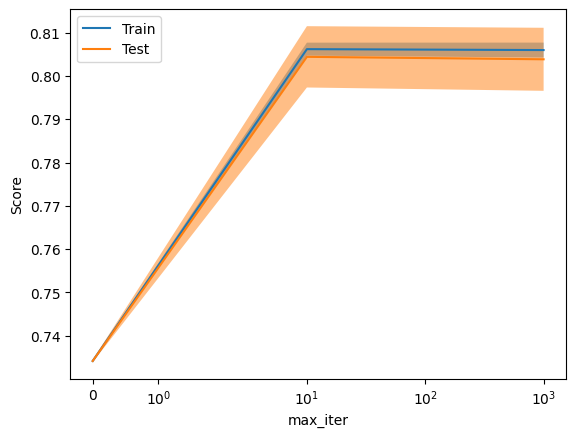

In [49]:
ValidationCurveDisplay.from_estimator(LogisticRegression(penalty = None, multi_class = 'ovr', solver = 'saga'), x_scaled, y, param_name = "max_iter", param_range = (0, 10, 1000))

In [34]:
LogisticModel = LogisticRegression(penalty = None, max_iter = 1000, multi_class = 'ovr', solver = 'saga').fit(x_train, y_train)

In [35]:
# Start of neural network
df_y_numeric = df_combined_transformed["Churn"].replace(['No', 'Yes'], [0, 1])
y_numeric = np.array(df_y_numeric)
print(y_numeric)

[0 0 1 ... 0 0 1]


In [36]:
x_train, x_test, y_train_numeric, y_test_numeric = train_test_split(x_scaled, y_numeric, test_size = 0.2, random_state = 0)

In [37]:
neuralModels = []

neuralModels.append(Sequential([Dense(units = 29, activation = "relu"),
                                Dense(units = 14, activation = "relu"),
                                Dense(units = 1, activation = "sigmoid")
                               ])
                   )

neuralModels.append(Sequential([Dense(units = 29, activation = "relu", kernel_regularizer = "l1"),
                                Dense(units = 14, activation = "relu", kernel_regularizer = "l1"),
                                Dense(units = 1, activation = "sigmoid")
                               ])
                   )

neuralModels.append(Sequential([Dense(units = 29, activation = "relu", kernel_regularizer = "l2"),
                                Dense(units = 14, activation = "relu", kernel_regularizer = "l2"),
                                Dense(units = 1, activation = "sigmoid")
                               ])
                   )

neuralModels.append(Sequential([Dense(units = 29, activation = "relu", kernel_regularizer = "l1_l2"),
                                Dense(units = 14, activation = "relu", kernel_regularizer = "l1_l2"),
                                Dense(units = 1, activation = "sigmoid")
                               ])
                   )

In [38]:
histories = []

for neuralModel in neuralModels:
    neuralModel.compile(loss = "binary_crossentropy", metrics = ['accuracy'])
    histories.append(neuralModel.fit(x_scaled, y_numeric, validation_split = 0.2, epochs = 100, batch_size = 10))


Epoch 1/100


563/563 [==============================] - 1s 1ms/step - loss: 0.4664 - accuracy: 0.7736 - val_loss: 0.4425 - val_accuracy: 0.7910
Epoch 2/100
563/563 [==============================] - 1s 880us/step - loss: 0.4250 - accuracy: 0.7962 - val_loss: 0.4446 - val_accuracy: 0.8017
Epoch 3/100
563/563 [==============================] - 1s 887us/step - loss: 0.4209 - accuracy: 0.8012 - val_loss: 0.4398 - val_accuracy: 0.7939
Epoch 4/100
563/563 [==============================] - 1s 898us/step - loss: 0.4189 - accuracy: 0.8016 - val_loss: 0.4338 - val_accuracy: 0.7925
Epoch 5/100
563/563 [==============================] - 1s 895us/step - loss: 0.4159 - accuracy: 0.8064 - val_loss: 0.4413 - val_accuracy: 0.7889
Epoch 6/100
563/563 [==============================] - 1s 907us/step - loss: 0.4148 - accuracy: 0.8046 - val_loss: 0.4348 - val_accuracy: 0.8067
Epoch 7/100
563/563 [==============================] - 1s 929us/step - loss: 0.4140 - accuracy: 0.8012 - val_loss: 0.4389 - val_a

563/563 [==============================] - 1s 980us/step - loss: 0.4970 - accuracy: 0.7968 - val_loss: 0.5068 - val_accuracy: 0.7989
Epoch 9/100
563/563 [==============================] - 1s 964us/step - loss: 0.4934 - accuracy: 0.7955 - val_loss: 0.5054 - val_accuracy: 0.7974
Epoch 10/100
563/563 [==============================] - 1s 936us/step - loss: 0.4892 - accuracy: 0.7987 - val_loss: 0.5074 - val_accuracy: 0.7996
Epoch 11/100
563/563 [==============================] - 1s 930us/step - loss: 0.4873 - accuracy: 0.7989 - val_loss: 0.4980 - val_accuracy: 0.7974
Epoch 12/100
563/563 [==============================] - 1s 947us/step - loss: 0.4833 - accuracy: 0.7975 - val_loss: 0.4952 - val_accuracy: 0.7896
Epoch 13/100
563/563 [==============================] - 1s 949us/step - loss: 0.4806 - accuracy: 0.7985 - val_loss: 0.4948 - val_accuracy: 0.7989
Epoch 14/100
563/563 [==============================] - 1s 949us/step - loss: 0.4791 - accuracy: 0.7980 - val_loss: 0.4902 - val_accuracy:

563/563 [==============================] - 1s 910us/step - loss: 0.4381 - accuracy: 0.7977 - val_loss: 0.4522 - val_accuracy: 0.8031
Epoch 21/100
563/563 [==============================] - 1s 924us/step - loss: 0.4373 - accuracy: 0.7996 - val_loss: 0.4521 - val_accuracy: 0.7982
Epoch 22/100
563/563 [==============================] - 1s 922us/step - loss: 0.4366 - accuracy: 0.8017 - val_loss: 0.4548 - val_accuracy: 0.8003
Epoch 23/100
563/563 [==============================] - 1s 919us/step - loss: 0.4379 - accuracy: 0.7996 - val_loss: 0.4488 - val_accuracy: 0.7967
Epoch 24/100
563/563 [==============================] - 1s 920us/step - loss: 0.4366 - accuracy: 0.8003 - val_loss: 0.4643 - val_accuracy: 0.7939
Epoch 25/100
563/563 [==============================] - 1s 907us/step - loss: 0.4361 - accuracy: 0.7985 - val_loss: 0.4475 - val_accuracy: 0.8031
Epoch 26/100
563/563 [==============================] - 1s 930us/step - loss: 0.4357 - accuracy: 0.7978 - val_loss: 0.4509 - val_accuracy

563/563 [==============================] - 0s 865us/step - loss: 0.4761 - accuracy: 0.7975 - val_loss: 0.4881 - val_accuracy: 0.7875
Epoch 33/100
563/563 [==============================] - 1s 886us/step - loss: 0.4745 - accuracy: 0.7973 - val_loss: 0.4880 - val_accuracy: 0.8010
Epoch 34/100
563/563 [==============================] - 1s 890us/step - loss: 0.4747 - accuracy: 0.7989 - val_loss: 0.4855 - val_accuracy: 0.7953
Epoch 35/100
563/563 [==============================] - 1s 878us/step - loss: 0.4739 - accuracy: 0.7978 - val_loss: 0.4977 - val_accuracy: 0.7932
Epoch 36/100
563/563 [==============================] - 1s 876us/step - loss: 0.4745 - accuracy: 0.7973 - val_loss: 0.4848 - val_accuracy: 0.8017
Epoch 37/100
563/563 [==============================] - 0s 874us/step - loss: 0.4739 - accuracy: 0.8000 - val_loss: 0.4832 - val_accuracy: 0.7996
Epoch 38/100
563/563 [==============================] - 0s 863us/step - loss: 0.4729 - accuracy: 0.8000 - val_loss: 0.4867 - val_accuracy

In [39]:
df_neural_regularization = pd.DataFrame(columns = ["Method", "Train score", "Test score"])

df_neural_regularization["Method"] = ["None", "L1", "L2", "Elastic net"]
df_neural_regularization["Train score"] = [round(history.history["accuracy"][-1], 4) for history in histories]
df_neural_regularization["Test score"] = [round(history.history["val_accuracy"][-1], 4) for history in histories]

df_neural_regularization.head(5)

,Method,Train score,Test score
0,None,0.8311,0.8003
1,L1,0.8042,0.8003
2,L2,0.8019,0.8045
3,Elastic net,0.8016,0.8038


In [40]:
neuralModel = Sequential([Dense(units = 29, activation = "relu", kernel_regularizer = "l2"),
                          Dense(units = 14, activation = "relu", kernel_regularizer = "l2"),
                          Dense(units = 1, activation = "sigmoid")
                         ])

neuralModel.compile(loss = "binary_crossentropy", metrics = ['accuracy'])

In [41]:
histories_batch = []

histories_batch.append(neuralModel.fit(x_scaled, y_numeric, epochs = 100, batch_size = 10))
histories_batch.append(neuralModel.fit(x_scaled, y_numeric, epochs = 100, batch_size = 50))
histories_batch.append(neuralModel.fit(x_scaled, y_numeric, epochs = 100, batch_size = 100))

Epoch 1/100
704/704 [==============================] - 1s 722us/step - loss: 0.6447 - accuracy: 0.7820
Epoch 2/100
704/704 [==============================] - 1s 719us/step - loss: 0.4997 - accuracy: 0.7972
Epoch 3/100
704/704 [==============================] - 1s 718us/step - loss: 0.4728 - accuracy: 0.7993
Epoch 4/100
704/704 [==============================] - 1s 726us/step - loss: 0.4623 - accuracy: 0.7995
Epoch 5/100
704/704 [==============================] - 1s 727us/step - loss: 0.4554 - accuracy: 0.7979
Epoch 6/100
704/704 [==============================] - 1s 718us/step - loss: 0.4519 - accuracy: 0.8003
Epoch 7/100
704/704 [==============================] - 1s 732us/step - loss: 0.4505 - accuracy: 0.7975
Epoch 8/100
704/704 [==============================] - 0s 707us/step - loss: 0.4482 - accuracy: 0.8006
Epoch 9/100
704/704 [==============================] - 1s 714us/step - loss: 0.4469 - accuracy: 0.7996
Epoch 10/100
704/704 [==============================] - 1s 711us/step - l

Epoch 58/100
141/141 [==============================] - 0s 691us/step - loss: 0.4254 - accuracy: 0.8057
Epoch 59/100
141/141 [==============================] - 0s 643us/step - loss: 0.4253 - accuracy: 0.8044
Epoch 60/100
141/141 [==============================] - 0s 682us/step - loss: 0.4254 - accuracy: 0.8036
Epoch 61/100
141/141 [==============================] - 0s 764us/step - loss: 0.4255 - accuracy: 0.8032
Epoch 62/100
141/141 [==============================] - 0s 907us/step - loss: 0.4257 - accuracy: 0.8054
Epoch 63/100
141/141 [==============================] - 0s 825us/step - loss: 0.4251 - accuracy: 0.8056
Epoch 64/100
141/141 [==============================] - 0s 692us/step - loss: 0.4252 - accuracy: 0.8043
Epoch 65/100
141/141 [==============================] - 0s 744us/step - loss: 0.4259 - accuracy: 0.8037
Epoch 66/100
141/141 [==============================] - 0s 673us/step - loss: 0.4256 - accuracy: 0.8037
Epoch 67/100
141/141 [==============================] - 0s 664us

In [42]:
df_neural_batch = pd.DataFrame(columns = ["Batch size", "Score"])

df_neural_batch["Batch size"] = ["10", "50", "100"]
df_neural_batch["Score"] = [round(history.history["accuracy"][-1], 4) for history in histories_batch]

df_neural_batch.head(5)

,Batch size,Score
0,10,0.8006
1,50,0.8044
2,100,0.8039


In [43]:
history = neuralModel.fit(x_scaled, y_numeric, validation_split = 0.2, epochs = 100, batch_size = 50)

Epoch 1/100
113/113 [==============================] - 0s 2ms/step - loss: 0.4201 - accuracy: 0.8057 - val_loss: 0.4308 - val_accuracy: 0.7932
Epoch 2/100
113/113 [==============================] - 0s 1ms/step - loss: 0.4217 - accuracy: 0.8039 - val_loss: 0.4338 - val_accuracy: 0.8088
Epoch 3/100
113/113 [==============================] - 0s 1ms/step - loss: 0.4213 - accuracy: 0.8032 - val_loss: 0.4308 - val_accuracy: 0.8017
Epoch 4/100
113/113 [==============================] - 0s 1ms/step - loss: 0.4207 - accuracy: 0.8037 - val_loss: 0.4392 - val_accuracy: 0.7832
Epoch 5/100
113/113 [==============================] - 0s 1ms/step - loss: 0.4216 - accuracy: 0.8041 - val_loss: 0.4359 - val_accuracy: 0.8095
Epoch 6/100
113/113 [==============================] - 0s 1ms/step - loss: 0.4210 - accuracy: 0.8058 - val_loss: 0.4313 - val_accuracy: 0.7982
Epoch 7/100
113/113 [==============================] - 0s 1ms/step - loss: 0.4210 - accuracy: 0.8049 - val_loss: 0.4318 - val_accuracy: 0.7974

Epoch 58/100
113/113 [==============================] - 0s 1ms/step - loss: 0.4202 - accuracy: 0.8046 - val_loss: 0.4363 - val_accuracy: 0.8053
Epoch 59/100
113/113 [==============================] - 0s 1ms/step - loss: 0.4204 - accuracy: 0.8049 - val_loss: 0.4330 - val_accuracy: 0.7989
Epoch 60/100
113/113 [==============================] - 0s 972us/step - loss: 0.4205 - accuracy: 0.8041 - val_loss: 0.4339 - val_accuracy: 0.7989
Epoch 61/100
113/113 [==============================] - 0s 978us/step - loss: 0.4208 - accuracy: 0.8032 - val_loss: 0.4345 - val_accuracy: 0.8045
Epoch 62/100
113/113 [==============================] - 0s 1ms/step - loss: 0.4210 - accuracy: 0.8037 - val_loss: 0.4369 - val_accuracy: 0.7846
Epoch 63/100
113/113 [==============================] - 0s 966us/step - loss: 0.4208 - accuracy: 0.8058 - val_loss: 0.4336 - val_accuracy: 0.7939
Epoch 64/100
113/113 [==============================] - 0s 1ms/step - loss: 0.4200 - accuracy: 0.8060 - val_loss: 0.4332 - val_acc

In [44]:
print(f'Accuracy: {round(history.history["accuracy"][-1], 4)}')

Accuracy: 0.8053


In [45]:
# Start of evaluation of noth model
y_pred_logistic = LogisticModel.predict(x_test)
print(y_pred_logistic)

['No' 'No' 'No' ... 'Yes' 'No' 'Yes']


In [46]:
print("Logistic Regression:")
print(classification_report(y_test, y_pred_logistic))

Logistic Regression:
              precision    recall  f1-score   support

          No       0.85      0.89      0.87      1039
         Yes       0.65      0.56      0.60       368

    accuracy                           0.81      1407
   macro avg       0.75      0.73      0.74      1407
weighted avg       0.80      0.81      0.80      1407



In [54]:
y_pred_neural = neuralModel.predict(x_test)
print(y_pred_neural)

44/44 [==============================] - 0s 689us/step
[[0.21927054]
 [0.14793426]
 [0.17597461]
 ...
 [0.67717254]
 [0.1422195 ]
 [0.53398955]]


In [55]:
y_pred_neural = tf.squeeze(y_pred_neural)
print(y_pred_neural)

tf.Tensor([0.21927054 0.14793426 0.17597461 ... 0.67717254 0.1422195  0.53398955], shape=(1407,), dtype=float32)


In [56]:
y_pred_neural = np.array([1 if y_pred > 0.5 else 0 for y_pred in y_pred_neural])
print(y_pred_neural)

[0 0 0 ... 1 0 1]


In [57]:
print("Neural Network:")
print(classification_report(y_test_numeric, y_pred_neural))

Neural Network:
              precision    recall  f1-score   support

           0       0.84      0.91      0.87      1039
           1       0.67      0.52      0.59       368

    accuracy                           0.81      1407
   macro avg       0.76      0.72      0.73      1407
weighted avg       0.80      0.81      0.80      1407



[[929 110]
 [162 206]]


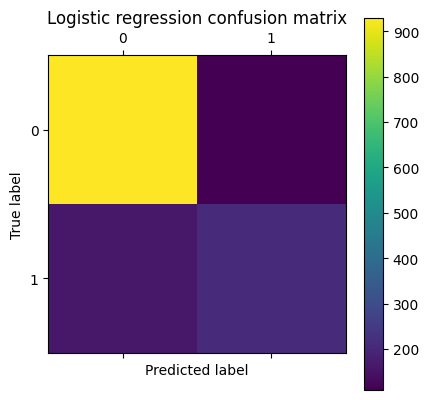

In [58]:
cm_logistic = confusion_matrix(y_test, y_pred_logistic)
print(cm_logistic)
    
plt.matshow(cm_logistic)
plt.title('Logistic regression confusion matrix')
plt.colorbar()
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

[[943  96]
 [175 193]]


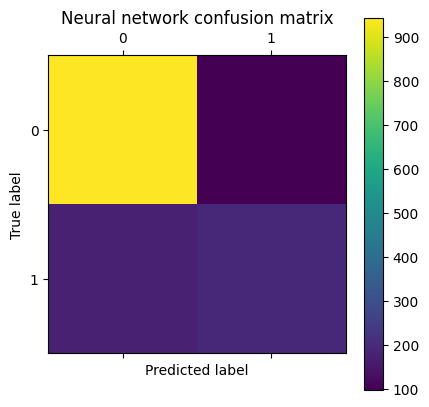

In [59]:
cm_neural = confusion_matrix(y_test_numeric, y_pred_neural)
print(cm_neural)
    
plt.matshow(cm_neural)
plt.title('Neural network confusion matrix')
plt.colorbar()
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

In [60]:
y_pred_2_logistic = LogisticModel.predict_proba(x_test)
print(y_pred_2_logistic)

[[0.71200955 0.28799045]
 [0.86466401 0.13533599]
 [0.80588886 0.19411114]
 ...
 [0.32698681 0.67301319]
 [0.81617809 0.18382191]
 [0.41430455 0.58569545]]


In [61]:
loss_logistic = log_loss(y_test, y_pred_2_logistic)
print(f'Logistic regression loss: {round(loss_logistic, 4)}')

Logistic regression loss: 0.4219


In [62]:
loss_and_metrics = neuralModel.evaluate(x_test, y_test_numeric)
print(f"Neural network loss: {round(loss_and_metrics[0], 4)}")

44/44 [==============================] - 0s 476us/step - loss: 0.4243 - accuracy: 0.8074
Neural network loss: 0.4243
